In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

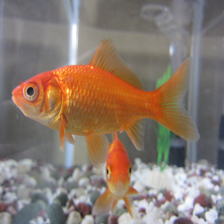

In [9]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [11]:
np.array(gold_fish).shape

(224, 224, 3)

In [12]:
gold_fish = np.array(gold_fish)/225
gold_fish

array([[[0.51555556, 0.51555556, 0.57777778],
        [0.51555556, 0.52888889, 0.59555556],
        [0.51555556, 0.53777778, 0.60444444],
        ...,
        [0.34666667, 0.34222222, 0.33333333],
        [0.36      , 0.33777778, 0.36      ],
        [0.34666667, 0.34222222, 0.36444444]],

       [[0.52444444, 0.53333333, 0.58666667],
        [0.52444444, 0.54222222, 0.60444444],
        [0.52888889, 0.54222222, 0.61777778],
        ...,
        [0.35111111, 0.34222222, 0.35555556],
        [0.36      , 0.35555556, 0.36888889],
        [0.36444444, 0.36      , 0.36      ]],

       [[0.53777778, 0.54222222, 0.6       ],
        [0.53777778, 0.55555556, 0.61333333],
        [0.54222222, 0.56      , 0.61777778],
        ...,
        [0.35555556, 0.34666667, 0.37333333],
        [0.35555556, 0.34666667, 0.36      ],
        [0.35555556, 0.33777778, 0.35111111]],

       ...,

       [[0.63111111, 0.63111111, 0.64      ],
        [0.64888889, 0.64444444, 0.64444444],
        [0.67111111, 0

In [13]:
gold_fish[np.newaxis, ...].shape#

(1, 224, 224, 3)

In [14]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 1s 1s/step


array([[ 0.22655508,  3.3814547 , 11.06914   , ..., -1.9290265 ,
         0.8947334 ,  0.3997953 ]], dtype=float32)

In [15]:
max_label_index = np.argmax(result)
max_label_index

2

In [17]:
imb_index = []
with open ("requirement.txt","r") as f:
    img_index = f.read().splitlines()
img_index[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [18]:
img_index[max_label_index]

'goldfish'

## Loading flower dataset

In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [21]:
data_dir

'.\\datasets\\flower_photos'

In [22]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [24]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [25]:
Daisy = list(data_dir.glob('Daisy/*'))

len(list(data_dir.glob('Daisy/*')))    #Daisy flower photos count

633

In [27]:
import PIL
from PIL import Image
flower = PIL.Image.open(str(Daisy[1]))    # original size of flower is (500, 313)
flower = flower.resize((100,100),Image.ANTIALIAS)

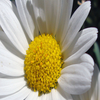

In [28]:
flower

In [29]:
flower_dict = {
    'daisy' : list(data_dir.glob('Daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'roses' : list(data_dir.glob('roses/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}
flower_labels = {
    'daisy' : 0,
    'dandelion' : 1,
    'roses' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [30]:
flower_dict['daisy'][:3]

[WindowsPath('datasets/flower_photos/Daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/Daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/Daisy/10172379554_b296050f82_n.jpg')]

In [31]:
str(flower_dict['daisy'][:3])

"[WindowsPath('datasets/flower_photos/Daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('datasets/flower_photos/Daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('datasets/flower_photos/Daisy/10172379554_b296050f82_n.jpg')]"

In [32]:
img = cv2.imread(str(flower_dict['roses'][0]))
img.shape

(240, 179, 3)

In [43]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [44]:
X, y = [],[]

for flower_name, images in flower_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flower_labels[flower_name])

X = np.array(X)
y = np.array(y)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
X_train[0] #Scaling required

array([[[ 93, 149, 184],
        [ 89, 148, 183],
        [ 84, 149, 184],
        ...,
        [ 28,  61,  76],
        [ 29,  63,  78],
        [ 33,  67,  83]],

       [[ 91, 147, 182],
        [ 88, 147, 182],
        [ 82, 147, 182],
        ...,
        [ 27,  60,  75],
        [ 27,  62,  76],
        [ 29,  64,  79]],

       [[ 89, 145, 180],
        [ 85, 144, 179],
        [ 81, 144, 181],
        ...,
        [ 28,  61,  75],
        [ 28,  61,  76],
        [ 28,  63,  77]],

       ...,

       [[ 30,  66,  72],
        [ 30,  66,  72],
        [ 30,  68,  73],
        ...,
        [ 26,  59,  61],
        [ 26,  58,  62],
        [ 28,  60,  65]],

       [[ 31,  67,  73],
        [ 31,  68,  74],
        [ 31,  69,  74],
        ...,
        [ 28,  61,  63],
        [ 29,  60,  65],
        [ 30,  62,  68]],

       [[ 32,  70,  75],
        [ 32,  70,  75],
        [ 31,  69,  74],
        ...,
        [ 28,  61,  64],
        [ 28,  60,  66],
        [ 29,  60,  69]]

In [47]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Using pretrained model and training for flower dataset

In [48]:
features = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_no_top_layer = hub.KerasLayer(
            features, input_shape=(224,224,3), trainable=False)

In [49]:
num_flowers = 5
model = tf.keras.Sequential([
    pretrained_no_top_layer,
    tf.keras.layers.Dense(num_flowers)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [50]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
81/81 [==============================] - 82s 907ms/step - loss: 0.8937 - acc: 0.6773
Epoch 2/5
81/81 [==============================] - 75s 928ms/step - loss: 0.4420 - acc: 0.8466
Epoch 3/5
81/81 [==============================] - 75s 920ms/step - loss: 0.3439 - acc: 0.8778
Epoch 4/5
81/81 [==============================] - 75s 921ms/step - loss: 0.2870 - acc: 0.9054
Epoch 5/5
81/81 [==============================] - 75s 929ms/step - loss: 0.2454 - acc: 0.9214


In [51]:
model.evaluate(X_test_scaled, y_test)

35/35 [==============================] - 35s 910ms/step - loss: 0.3769 - acc: 0.8656


[0.37691012024879456, 0.8655767440795898]